In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [2]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in ["sex","smoker","region"]:
    df[column]=label_encoder.fit_transform(df[column])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [4]:
x=df.drop("charges",axis=1).values
y=df["charges"].values
print(x.shape,y.shape)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

(1338, 6) (1338,)


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1003, 6), (335, 6), (1003,), (335,))

In [6]:
import torch

x_train=torch.tensor(x_train, dtype=torch.float32)
x_test=torch.tensor(x_test, dtype=torch.float32)
y_train=torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test=torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)


from torch.utils.data import Dataset, DataLoader, TensorDataset

dataset_train = TensorDataset(x_train,y_train)
dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)

dataset_test = TensorDataset(x_test,y_test)
dataloader_test = DataLoader(dataset_test, batch_size=32, shuffle=False)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

(torch.Size([1003, 6]),
 torch.Size([1003, 1]),
 torch.Size([335, 6]),
 torch.Size([335, 1]))

In [7]:
import torch.nn as nn
import torch.optim as optim


class regreassion(nn.Module):
    def __init__(self):
        super(regreassion, self).__init__()
        self.fc1 = nn.Linear(6, 8)
        self.fc2 = nn.Linear(8, 3)
        self.fc3 = nn.Linear(3, 1)
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = regreassion()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [8]:
train_losses = []
test_accuracies = []

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in dataloader_train:
        
        # 기울기 초기화
        optimizer.zero_grad()

        # loss 확인
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 역전파, 가중치 업데트
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    
    # 평균 로스 기록
    train_losses.append(running_loss / len(dataloader_train))
    print(f"Epoch {epoch + 1}, Loss: {train_losses[-1]:.4f}")

print("Training complete.")


Epoch 1, Loss: 317506092.5000
Epoch 2, Loss: 322060139.5000
Epoch 3, Loss: 316989741.5000
Epoch 4, Loss: 316667064.5000
Epoch 5, Loss: 316031860.0000
Epoch 6, Loss: 315383559.0000
Epoch 7, Loss: 313991062.5000
Epoch 8, Loss: 316749702.5000
Epoch 9, Loss: 322808751.5000
Epoch 10, Loss: 313486519.0000
Epoch 11, Loss: 313342886.7500
Epoch 12, Loss: 318518598.5000
Epoch 13, Loss: 320143502.5000
Epoch 14, Loss: 317175634.5000
Epoch 15, Loss: 317306108.0000
Epoch 16, Loss: 315301581.5000
Epoch 17, Loss: 315473807.5000
Epoch 18, Loss: 315529242.0000
Epoch 19, Loss: 316355449.5000
Epoch 20, Loss: 312979113.7500
Epoch 21, Loss: 315437846.5000
Epoch 22, Loss: 318122715.0000
Epoch 23, Loss: 319979446.0000
Epoch 24, Loss: 320247936.0000
Epoch 25, Loss: 316468636.2500
Epoch 26, Loss: 312213552.0000
Epoch 27, Loss: 310984743.0000
Epoch 28, Loss: 314892477.7500
Epoch 29, Loss: 312243879.0000
Epoch 30, Loss: 314191067.0000
Epoch 31, Loss: 312968195.5000
Epoch 32, Loss: 308122238.0000
Epoch 33, Loss: 3

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error

# 실제 라벨, 예측값 기록
all_labels = []
all_predictions = []

with torch.no_grad():
    for inputs, labels in dataloader_test:
        outputs = model(inputs).cpu().numpy()
        all_predictions.extend(outputs)
        all_labels.extend(labels.numpy())

mse = mean_squared_error(all_labels, all_predictions)
print(f"Test MSE: {mse:.4f}")

Test MSE: 314973216.0000


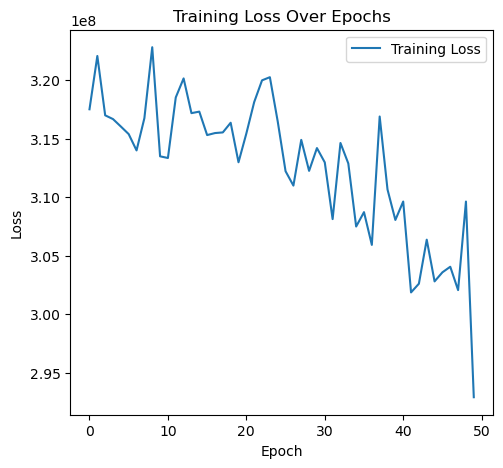

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

plt.show()